In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [25]:
# read in dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape

(891, 12)

In [26]:
# survived is dependent variable
y = train['Survived']
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


### Classify variables

- Categorical variables: Survived, Sex, Cabin, Embarked
- Ordinal variables: Pclass
- Continuous variables: Age, Fare
- Discrete variables: SibSp, Parch

In [27]:
# check to see how many values are missing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mionoff, Mr. Stoytcho",male,1601,B96 B98,S
freq,1,577,7,4,644


- ticket has more than 20% duplicate values

<AxesSubplot:>

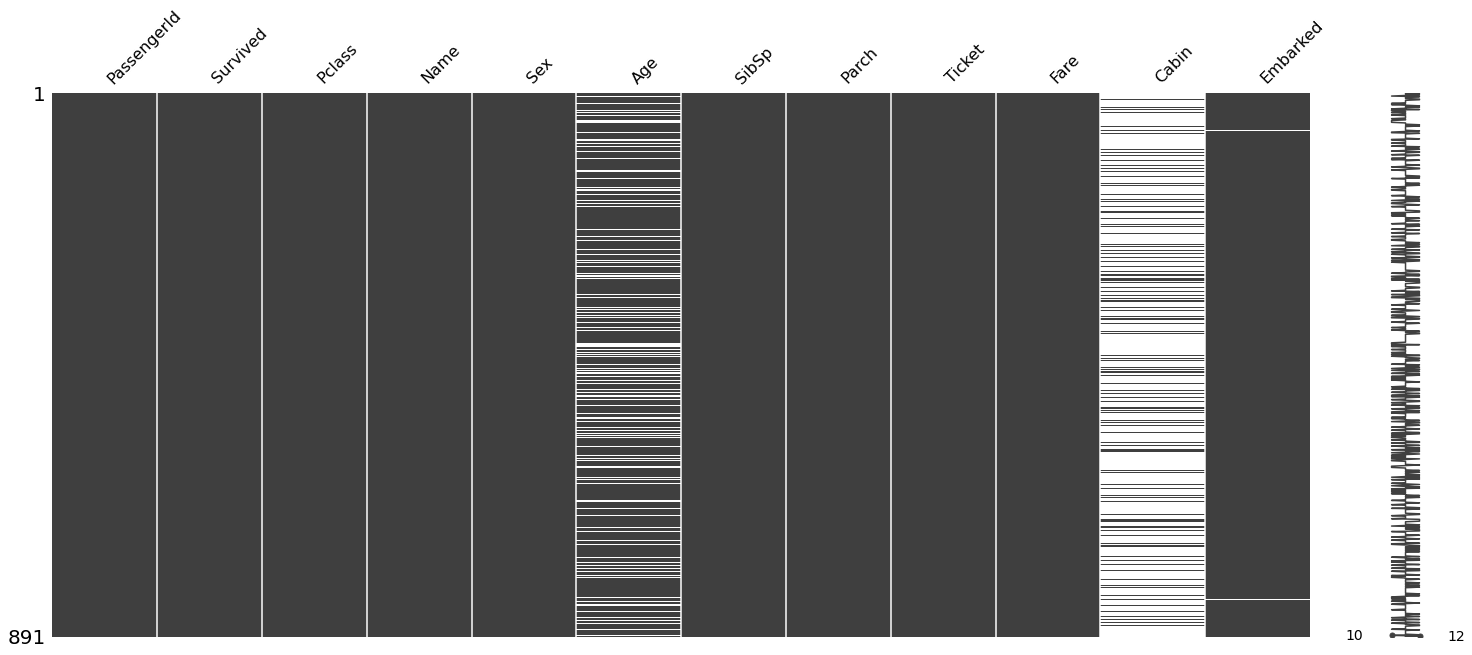

In [52]:
msno.matrix(train)

- age, cabin have many missing values
- survival rate is ~38%
- it will be difficult to fill in missing age and cabin values

In [83]:
# Let's examine how the continuous variables change wrt the target variable


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'PassengerId'),
  Text(1.5, 0, 'Survived'),
  Text(2.5, 0, 'Pclass'),
  Text(3.5, 0, 'Age'),
  Text(4.5, 0, 'SibSp'),
  Text(5.5, 0, 'Parch'),
  Text(6.5, 0, 'Fare')])

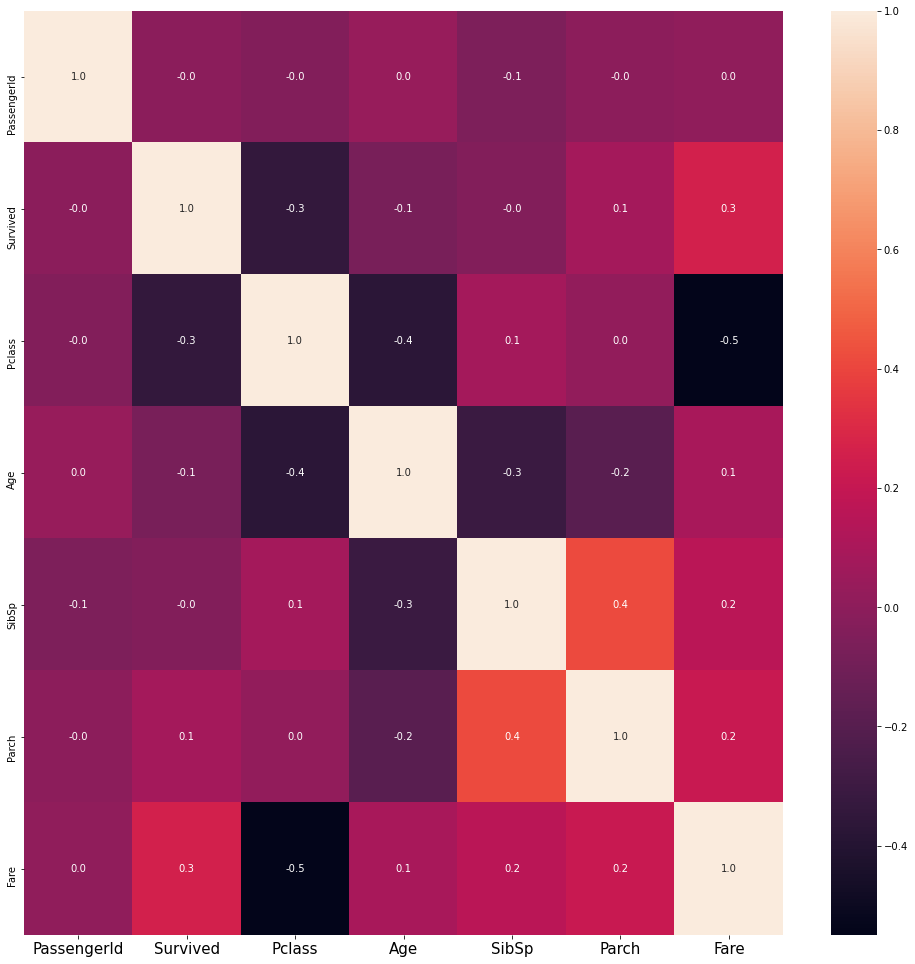

In [49]:
# examine correlations among the dataset
plt.figure(figsize = (17,17))

sns.heatmap(train.corr(), annot = True, fmt = '.1f')
plt.xticks(fontsize = 15)

In [63]:
# # lets explore the distribution of each variable
# fig, ax = plt.subplots(nrows = 3, 
#                        ncols = 2)
# for i in train.columns:
#     sns.distplot(train[i])

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

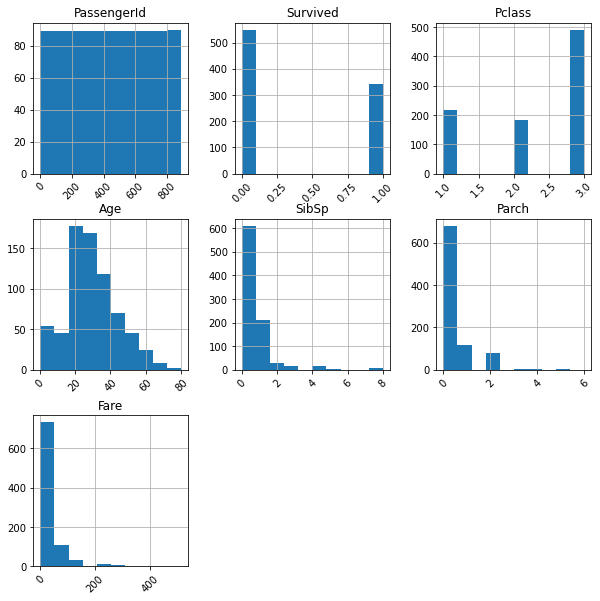

In [64]:
train.hist(figsize = (10,10),
          xrot = 45)

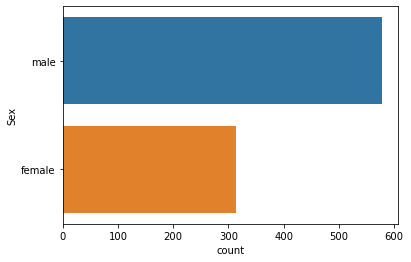

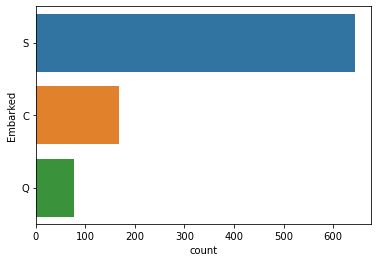

In [68]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 10:
        sns.countplot(y=column, data=train)
        plt.show()

Observations for features
- it might be worthwhile to convert ages into ordinal variables
- it could be interesting to add up sibling values